In [1]:
!pip install -q  shap lime shapash eli5 skater skope-rules

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.7/652.7 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 44.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s e

In [2]:
import pandas as pd
df_lin_reg = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
del df_lin_reg['date']
df_lin_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [3]:
#y is the dependent variable, that we need to predict
y = df_lin_reg.pop('Appliances')
# X is the set of input features
X = df_lin_reg

In [4]:
import pandas as pd
import shap
import sklearn

# a simple linear model initialized
model = sklearn.linear_model.LinearRegression()

# linear regression model trained
model.fit(X, y)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


LinearRegression()

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

lights = 1.98971
T1 = -0.60374
RH_1 = 15.15362
T2 = -17.70602
RH_2 = -13.48062
T3 = 25.4064
RH_3 = 4.92457
T4 = -3.46525
RH_4 = -0.17891
T5 = -0.02784
RH_5 = 0.14096
T6 = 7.12616
RH_6 = 0.28795
T7 = 1.79463
RH_7 = -1.54968
T8 = 8.14656
RH_8 = -4.66968
T9 = -15.87243
RH_9 = -0.90102
T_out = -10.22819
Press_mm_hg = 0.13986
RH_out = -1.06375
Windspeed = 1.70364
Visibility = 0.15368
Tdewpoint = 5.0488
rv1 = -0.02078
rv2 = -0.02078


One of the fundamental properties of Shapley values is that they always sum up to the difference between the game outcome when all players are present and the game outcome when no players are present. For machine learning models, this means that SHAP values of all the input features will always sum up to the difference between the baseline (expected) model output and the current model output for the prediction being explained.

Permutation explainer: 19736it [09:05, 35.87it/s]                           


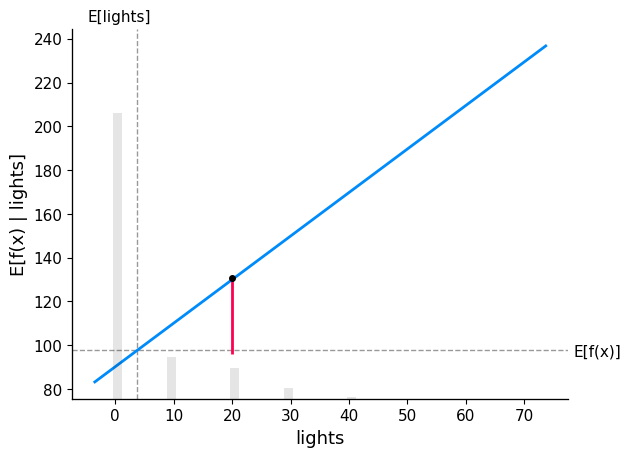

In [6]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)

# SHAP value calculation
shap_values = explainer(X)

# make a standard partial dependence plot for lights on predicted output
sample_ind = 20
shap.partial_dependence_plot(
    "lights", model.predict, X, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)


In [7]:
import numpy as np
pd.DataFrame(np.round(shap_values.values,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,54.916,1.125,111.299,22.239,-60.481,-65.677,26.330,6.334,-1.129,0.066,...,38.380,-3.374,15.269,-2.924,-15.004,4.586,4.023,6.758,0.297,0.297
1,54.916,1.125,97.610,22.239,-59.571,-65.677,26.625,6.334,-1.205,0.066,...,37.851,-3.401,16.462,-2.910,-15.004,4.018,3.433,6.253,0.186,0.186
2,54.916,1.125,91.650,22.239,-58.280,-65.677,27.331,6.588,-1.187,0.066,...,38.909,-3.347,17.656,-2.896,-15.004,3.450,2.844,5.748,-0.022,-0.022


In [8]:

# average prediction value is called as the base value
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

,0
0,95.815
1,95.815
2,95.815


In [9]:
pd.DataFrame(np.round(shap_values.data,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,30.0,19.89,47.597,19.2,44.790,19.79,44.730,19.000,45.567,17.167,...,17.033,45.53,6.600,733.5,92.0,7.000,63.000,5.3,13.275,13.275
1,30.0,19.89,46.693,19.2,44.722,19.79,44.790,19.000,45.992,17.167,...,17.067,45.56,6.483,733.6,92.0,6.667,59.167,5.2,18.606,18.606
2,30.0,19.89,46.300,19.2,44.627,19.79,44.933,18.927,45.890,17.167,...,17.000,45.50,6.367,733.7,92.0,6.333,55.333,5.1,28.643,28.643


Recipe 2-2. SHAP Partial Dependency Plot for a Regression Model
- Problem
You want to get a partial dependency plot from SHAP.

- Solution
The solution to this problem is to use the partial dependency method (partial_dependence_plot) from the model.

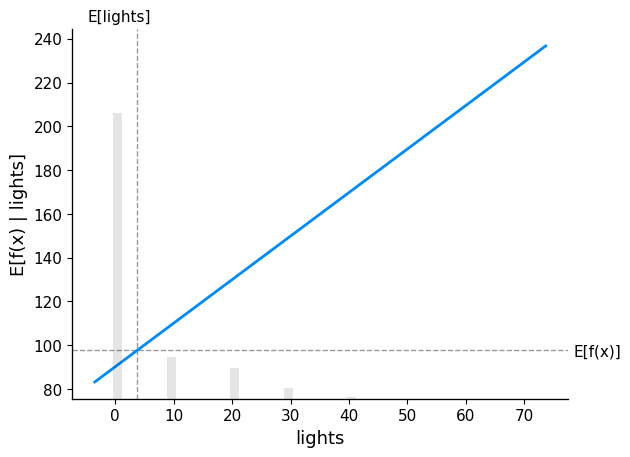

In [10]:
shap.partial_dependence_plot(
    "lights", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

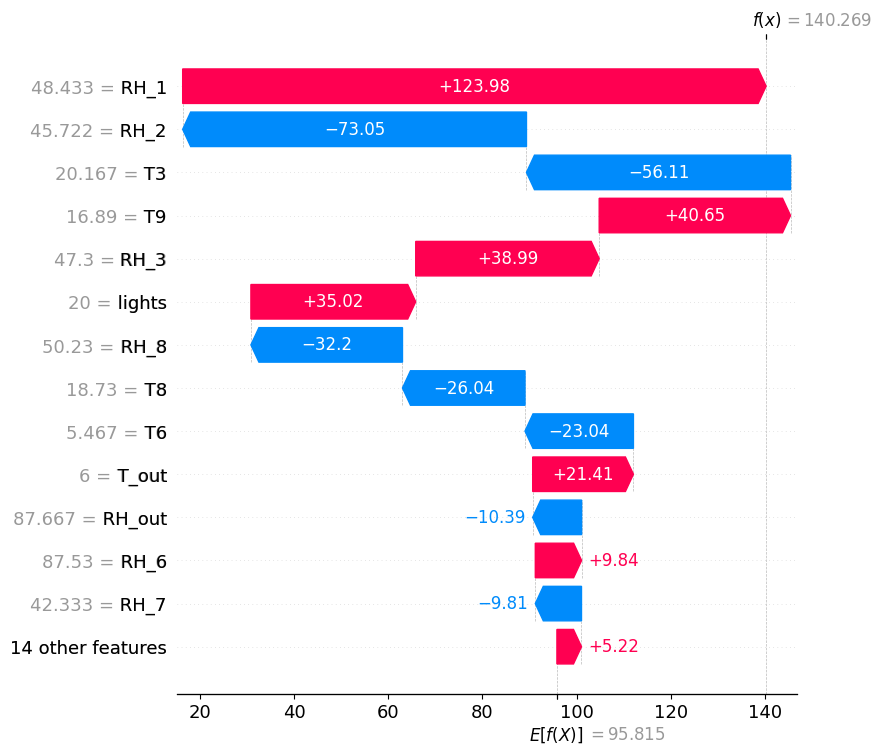

In [11]:

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [12]:

#computing shap importance values for the linear model
import numpy as np
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)


In [13]:
print(shap_importance)

       col_name  feature_importance_vals
2          RH_1                48.898098
19        T_out                43.634276
4          RH_2                42.890944
5            T3                40.503487
11           T6                34.648646
3            T2                30.416245
17           T9                25.669976
16         RH_8                20.145285
24    Tdewpoint                17.008406
21       RH_out                13.417327
6          RH_3                13.308497
15           T8                12.744739
0        lights                10.170411
12         RH_6                 7.669429
14         RH_7                 6.648869
7            T4                 5.572553
22    Windspeed                 3.447370
13           T7                 3.118758
18         RH_9                 3.092595
23   Visibility                 1.373324
10         RH_5                 0.864137
20  Press_mm_hg                 0.842126
1            T1                 0.752479
8          RH_4 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


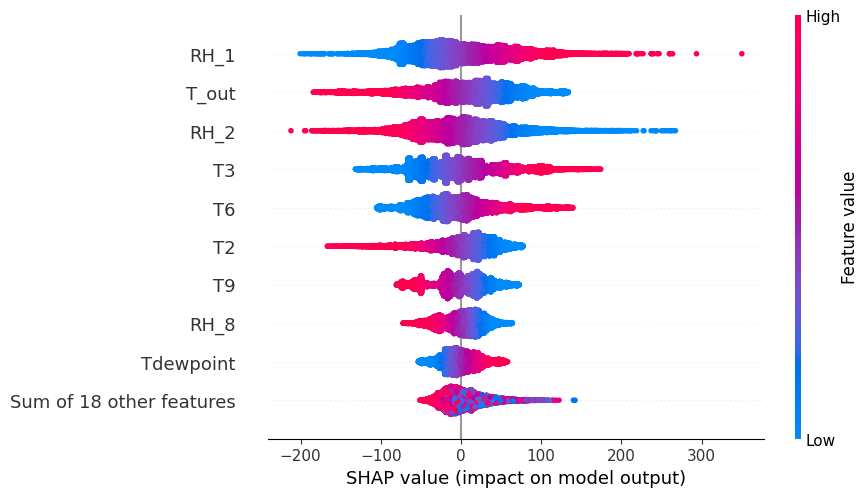

In [14]:
shap.plots.beeswarm(shap_values)

In [15]:
df1 = pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/automobile.csv')
df1.head(3)

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7


In [16]:
df_t = pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/Automobile_transformed.csv')

del df_t['Unnamed: 0']
df_t.head(3)


,Price,Age,Odometer,mileage,engineCC,powerBhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,FuelType_Diesel,FuelType_Electric,FuelType_LPG,FuelType_Petrol,Transmission_Manual,OwnerType_Fourth +ACY- Above,OwnerType_Second,OwnerType_Third
0,1.75,10,72000,26.60,998.0,58.16,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,12.50,5,41000,19.67,1582.0,126.20,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,4.50,9,46000,18.20,1199.0,88.70,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [17]:

#y is the dependent variable, that we need to predict
y = df_t.pop('Price')
# X is the set of input features
X = df_t

In [18]:
import pandas as pd
import shap
import sklearn

# a simple linear model initialized
model = sklearn.linear_model.LinearRegression()

# linear regression model trained
model.fit(X, y)

LinearRegression()

In [19]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

Age = -0.92281
Odometer = 0.0
mileage = -0.07923
engineCC = -4e-05
powerBhp = 0.1356
Location_Bangalore = 2.00658
Location_Chennai = 0.94944
Location_Coimbatore = 2.23592
Location_Delhi = -0.29837
Location_Hyderabad = 1.8771
Location_Jaipur = 0.8738
Location_Kochi = 0.03311
Location_Kolkata = -0.86024
Location_Mumbai = -0.81593
Location_Pune = 0.33843
FuelType_Diesel = -1.2545
FuelType_Electric = 7.03139
FuelType_LPG = 0.79077
FuelType_Petrol = -2.8691
Transmission_Manual = -2.92415
OwnerType_Fourth +ACY- Above = 1.7104
OwnerType_Second = -0.55923
OwnerType_Third = 0.76687


In [21]:

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)

# SHAP value calculation
shap_values = explainer(X)

Permutation explainer: 6020it [03:04, 30.67it/s]


In [22]:

import numpy as np
pd.DataFrame(np.round(shap_values.values,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-3.064,0.006,-0.657,0.022,-6.752,-0.181,-0.076,-0.268,0.021,-0.188,...,-0.751,-0.041,0.602,0.0,0.0,1.435,-0.526,0.0,0.101,-0.023
1,1.550,-0.006,-0.108,0.000,2.474,-0.181,-0.076,-0.268,0.021,-0.188,...,0.065,0.298,-0.652,0.0,0.0,1.435,-0.526,0.0,0.101,-0.023
2,-2.141,-0.004,0.008,0.015,-2.611,-0.181,0.873,-0.268,0.021,-0.188,...,0.065,-0.041,0.602,0.0,0.0,-1.435,-0.526,0.0,0.101,-0.023


In [23]:
# average prediction value is called as the base value
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

,0
0,8.552
1,8.552
2,8.552


In [24]:

pd.DataFrame(np.round(shap_values.data,3)).head(3)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,10.0,72000.0,26.60,998.0,58.16,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5.0,41000.0,19.67,1582.0,126.20,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9.0,46000.0,18.20,1199.0,88.70,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


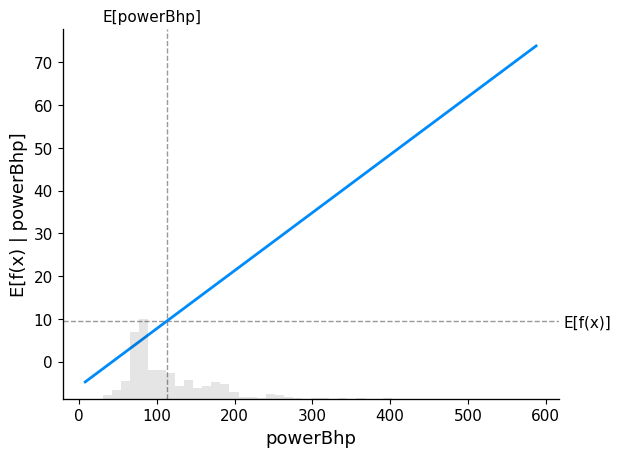

In [25]:
shap.partial_dependence_plot(
    "powerBhp", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

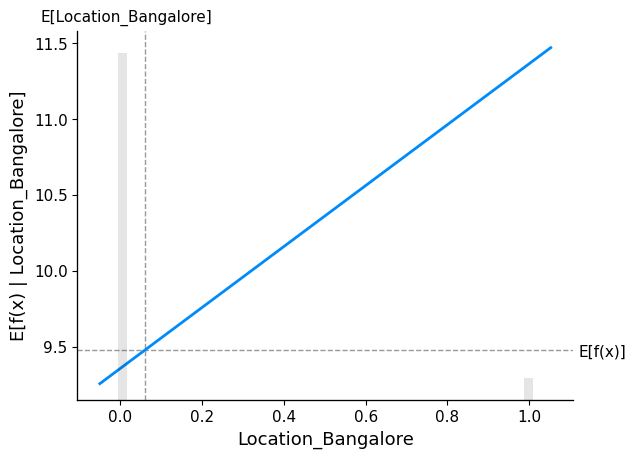

In [26]:

shap.partial_dependence_plot(
    "Location_Bangalore", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

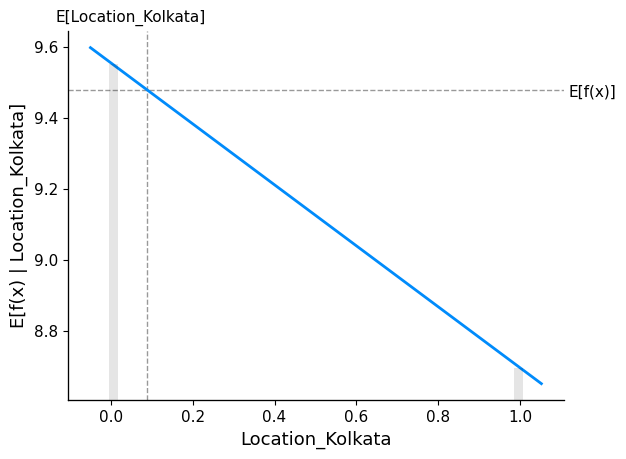

In [27]:
shap.partial_dependence_plot(
    "Location_Kolkata", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)


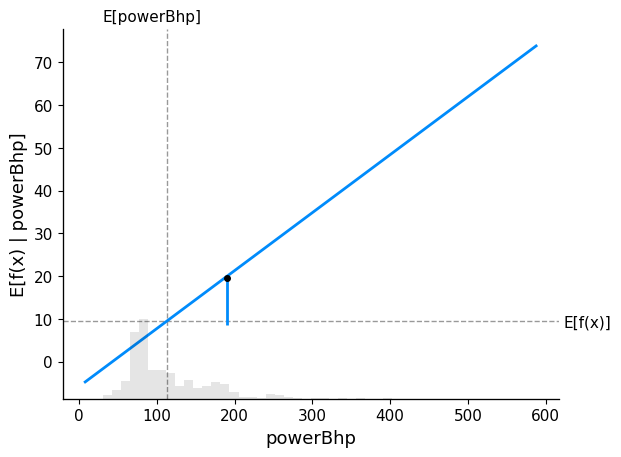

In [28]:
# make a standard partial dependence plot for lights on predicted output
sample_ind = 20 #20th record from the dataset
shap.partial_dependence_plot(
    "powerBhp", model.predict, X, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

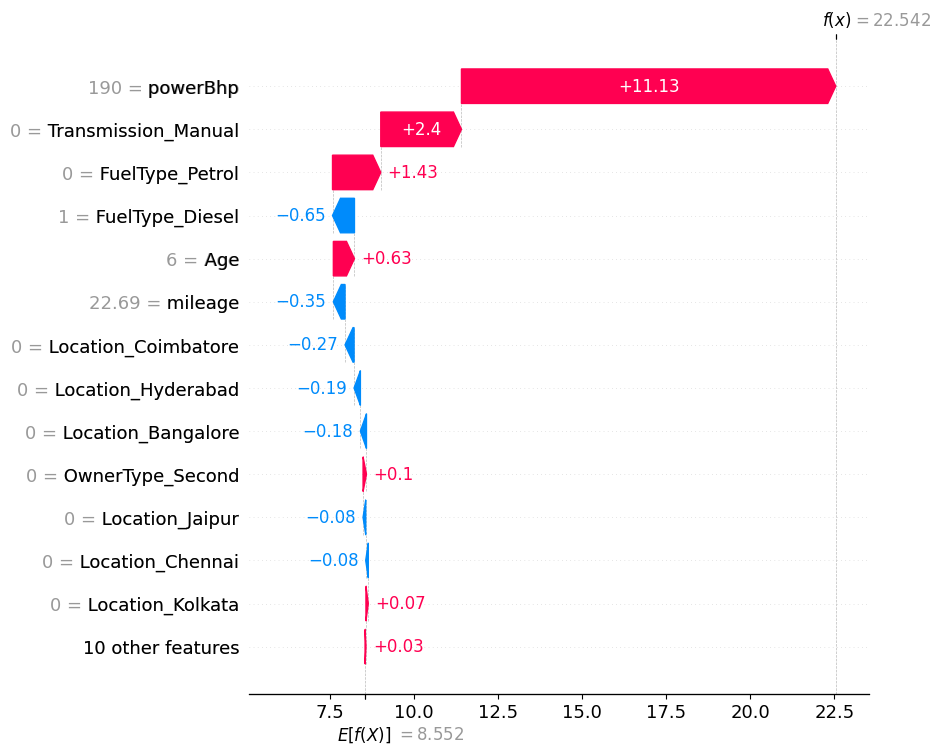

In [29]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [30]:
#computing shap importance values for the linear model
import numpy as np
# feature names from the training data
feature_names = shap_values.feature_names
#combining the shap values with feature names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
#taking the absolute shap values
vals = np.abs(shap_df.values).mean(0)
#creating a dataframe view
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
#sorting the importance values
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)


In [31]:
print(shap_importance)

                        col_name  feature_importance_vals
4                       powerBhp                 5.337252
0                            Age                 2.390802
18               FuelType_Petrol                 1.434552
19           Transmission_Manual                 1.061138
15               FuelType_Diesel                 0.628882
7            Location_Coimbatore                 0.447867
9             Location_Hyderabad                 0.372832
5             Location_Bangalore                 0.278458
2                        mileage                 0.265386
21              OwnerType_Second                 0.158222
13               Location_Mumbai                 0.155232
6               Location_Chennai                 0.141412
12              Location_Kolkata                 0.133048
10               Location_Jaipur                 0.127807
14                 Location_Pune                 0.067191
8                 Location_Delhi                 0.044503
22            

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


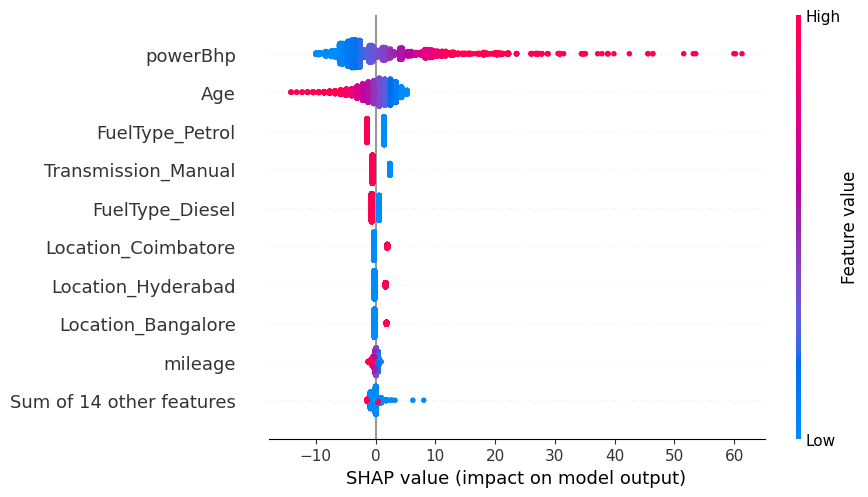

In [32]:

shap.plots.beeswarm(shap_values)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report

df_train = pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/ChurnData_test.csv')
df_train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [36]:
from sklearn.preprocessing import LabelEncoder

tras = LabelEncoder()
df_train['area_code_tr'] = tras.fit_transform(df_train['area_code'])
df_train.columns
del df_train['area_code']
df_train.columns
df_train['target_churn_dum'] = pd.get_dummies(df_train.churn,prefix='churn',drop_first=True)
df_train.columns
del df_train['international_plan']
del df_train['voice_mail_plan']
del df_train['churn']
df_train.info()
del df_train['Unnamed: 0']
df_train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1667 non-null   int64  
 1   state                          1667 non-null   object 
 2   account_length                 1667 non-null   int64  
 3   number_vmail_messages          1667 non-null   int64  
 4   total_day_minutes              1667 non-null   float64
 5   total_day_calls                1667 non-null   int64  
 6   total_day_charge               1667 non-null   float64
 7   total_eve_minutes              1667 non-null   float64
 8   total_eve_calls                1667 non-null   int64  
 9   total_eve_charge               1667 non-null   float64
 10  total_night_minutes            1667 non-null   float64
 11  total_night_calls              1667 non-null   int64  
 12  total_night_charge             1667 non-null   f

Index(['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'area_code_tr', 'target_churn_dum'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split

df_train.columns

X = df_train[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'area_code_tr']]
Y = df_train['target_churn_dum']

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,stratify=Y)
log_model = LogisticRegression()

log_model.fit(xtrain,ytrain)

print("training accuracy:", log_model.score(xtrain,ytrain)) #training accuracy

print("test accuracy:",log_model.score(xtest,ytest)) # test accuracy

training accuracy: 0.8687171792948237
test accuracy: 0.8652694610778443


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [39]:
# Provide Probability as Output
def model_churn_proba(x):
    return log_model.predict_proba(x)[:,1]

# Provide Log Odds as Output
def model_churn_log_odds(x):
    p = log_model.predict_log_proba(x)
    return p[:,1] - p[:,0]


# compute the SHAP values for the linear model
background_churn = shap.maskers.Independent(X, max_samples=2000)
explainer = shap.Explainer(log_model, background_churn,feature_names=list(X.columns))
shap_values_churn = explainer(X)

shap_values_churn


.values =
array([[-4.00044430e-03,  2.61856290e-01, -1.17988081e+00, ...,
         3.92661490e-04,  6.02310561e-01,  1.48488914e-02],
       [-6.51971466e-02,  2.61856290e-01,  4.51834507e-01, ...,
        -1.11400050e-03, -6.75108911e-01,  1.48488914e-02],
       [-7.40026109e-03, -8.12572385e-01,  1.21159193e+00, ...,
         4.75678587e-03, -2.49302420e-01, -1.45840479e-02],
       ...,
       [ 6.39958916e-02,  2.61856290e-01, -4.35083443e-01, ...,
         4.60092429e-03, -2.49302420e-01,  1.32421743e-04],
       [-1.75997115e-02,  2.61856290e-01,  7.99701136e-02, ...,
        -2.51675477e-03, -6.75108911e-01,  1.48488914e-02],
       [ 2.14981817e-02, -9.97818708e-01, -5.54763937e-01, ...,
        -1.42572367e-03, -6.75108911e-01,  1.32421743e-04]])

.base_values =
array([-2.1801199, -2.1801199, -2.1801199, ..., -2.1801199, -2.1801199,
       -2.1801199])

.data =
array([[101.  ,   0.  ,  70.9 , ...,   2.86,   3.  ,   2.  ],
       [137.  ,   0.  , 223.6 , ...,   2.57,   0.  ,  

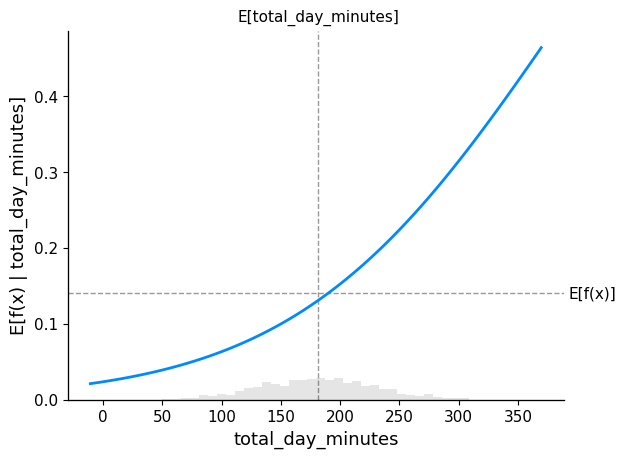

In [40]:
# make a standard partial dependence plot
sample_ind = 25
fig,ax = shap.partial_dependence_plot(
    "total_day_minutes", model_churn_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [41]:
shap_values = pd.DataFrame(shap_values_churn.values)
shap_values.columns = list(X.columns)
shap_values.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_tr
0,-0.004000,0.261856,-1.179881,-0.287933,-0.023629,0.038087,0.494064,0.000333,-0.039666,0.451031,0.000037,0.005875,0.097932,0.000393,0.602311,0.014849
1,-0.065197,0.261856,0.451835,0.160017,0.009044,0.142937,-0.698440,0.001251,0.114143,0.315088,-0.000106,-0.016467,-0.192942,-0.001114,-0.675109,0.014849


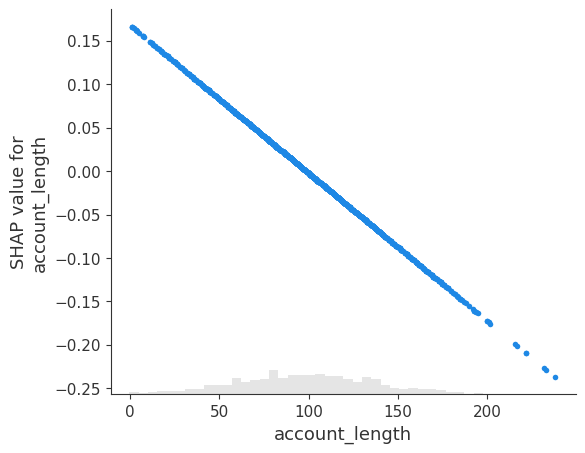

In [42]:

shap.plots.scatter(shap_values_churn[:,'account_length'])

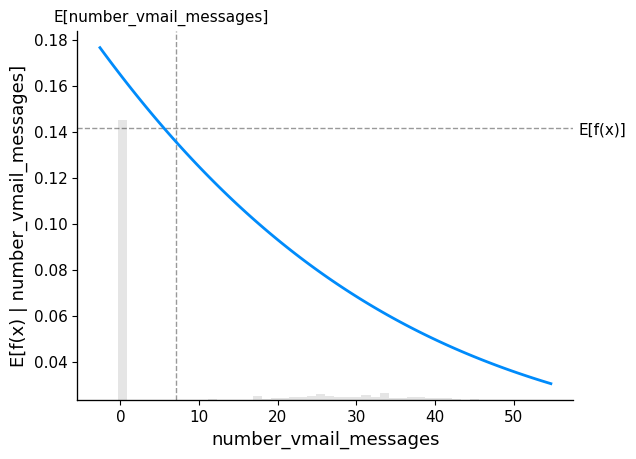

In [43]:
# make a standard partial dependence plot
sample_ind = 25
fig,ax = shap.partial_dependence_plot(
    "number_vmail_messages", model_churn_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False,ice=False)



In [45]:

# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(log_model, background_churn,feature_names=list(X.columns))
shap_values_churn_log_odds = explainer_log_odds(X)
shap_values_churn_log_odds

.values =
array([[-4.00044430e-03,  2.61856290e-01, -1.17988081e+00, ...,
         3.92661490e-04,  6.02310561e-01,  1.48488914e-02],
       [-6.51971466e-02,  2.61856290e-01,  4.51834507e-01, ...,
        -1.11400050e-03, -6.75108911e-01,  1.48488914e-02],
       [-7.40026109e-03, -8.12572385e-01,  1.21159193e+00, ...,
         4.75678587e-03, -2.49302420e-01, -1.45840479e-02],
       ...,
       [ 6.39958916e-02,  2.61856290e-01, -4.35083443e-01, ...,
         4.60092429e-03, -2.49302420e-01,  1.32421743e-04],
       [-1.75997115e-02,  2.61856290e-01,  7.99701136e-02, ...,
        -2.51675477e-03, -6.75108911e-01,  1.48488914e-02],
       [ 2.14981817e-02, -9.97818708e-01, -5.54763937e-01, ...,
        -1.42572367e-03, -6.75108911e-01,  1.32421743e-04]])

.base_values =
array([-2.1801199, -2.1801199, -2.1801199, ..., -2.1801199, -2.1801199,
       -2.1801199])

.data =
array([[101.  ,   0.  ,  70.9 , ...,   2.86,   3.  ,   2.  ],
       [137.  ,   0.  , 223.6 , ...,   2.57,   0.  ,  

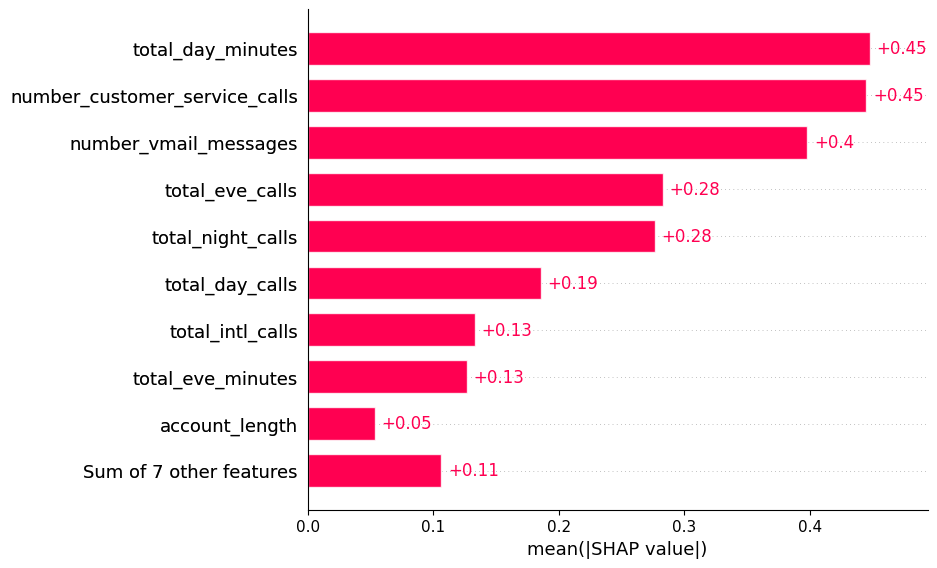

In [46]:
shap.plots.bar(shap_values_churn_log_odds)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


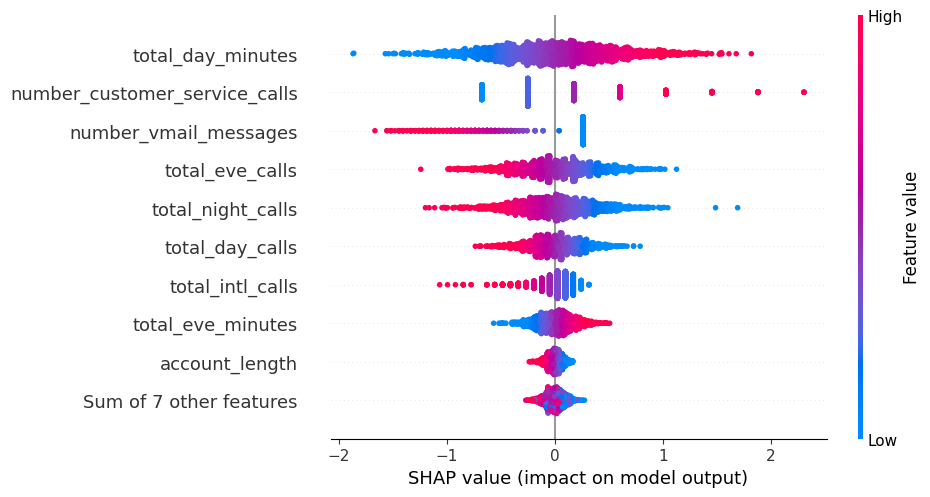

In [47]:
shap.plots.beeswarm(shap_values_churn_log_odds)

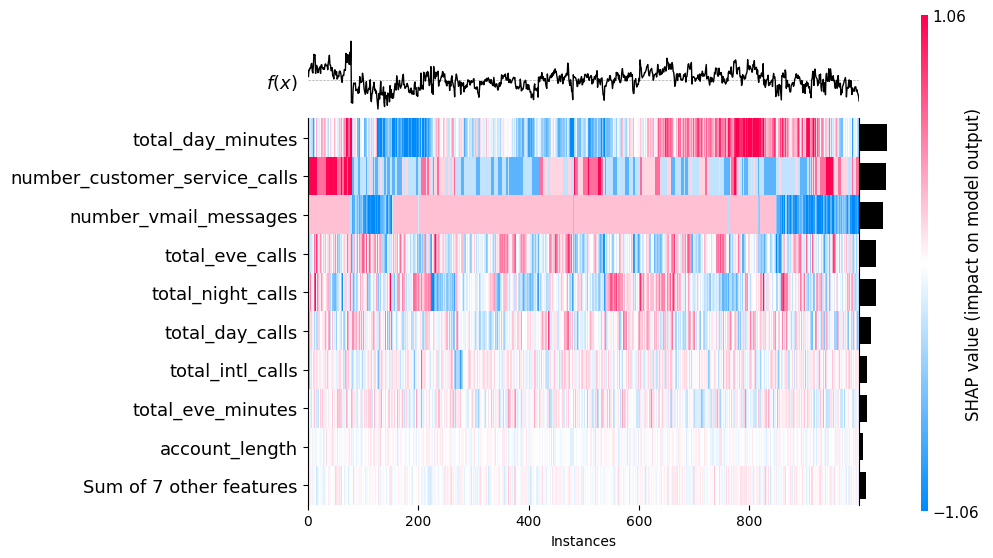

In [48]:

shap.plots.heatmap(shap_values_churn_log_odds[:1000])